## sentiment analysis on the reviews

### Objective:

The objective of this use case is to perform sentiment analysis on the reviews of the All-New Fire HD 8 Tablet to understand customer sentiments towards the product. By analyzing these reviews, we aim to identify the overall customer satisfaction and key factors influencing positive and negative sentiments. This analysis will help Amazon and potential buyers gain insights into the strengths and weaknesses of the product. The results can also guide improvements in future product development and marketing strategies.

### Importing Libraries

In [14]:
import warnings 
warnings.filterwarnings('ignore') 
import pandas as pd 
import re
import string
import seaborn as sns 
from sklearn.feature_extraction.text import TfidfVectorizer 
import matplotlib.pyplot as plt 

### Load the dataset

In [6]:
df = pd.read_csv(r"C:\Users\jayak\OneDrive\Desktop\flipkart_review.csv")

# Display the first few rows of the dataset
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [7]:
df.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [9]:
# Check for missing values
print(df.isnull().sum())

id                          0
name                     6760
asins                       2
brand                       0
categories                  0
keys                        0
manufacturer                0
reviews.date               39
reviews.dateAdded       10621
reviews.dateSeen            0
reviews.didPurchase     34659
reviews.doRecommend       594
reviews.id              34659
reviews.numHelpful        529
reviews.rating             33
reviews.sourceURLs          0
reviews.text                1
reviews.title               6
reviews.userCity        34660
reviews.userProvince    34660
reviews.username            7
dtype: int64


### Data Cleaning and Preprocessing

Data cleaning and preprocessing involve preparing raw data for analysis by addressing inconsistencies and ensuring data quality. This process includes handling missing values, correcting errors, removing duplicates, and standardizing data formats. Preprocessing steps may also involve normalization, encoding categorical variables, and feature scaling. Effective data cleaning and preprocessing are crucial for accurate and reliable analytical results.

In [10]:
# Drop irrelevant columns (example: 'id', 'asins', 'keys', 'reviews.sourceURLs', 'reviews.userCity', 'reviews.userProvince')
columns_to_drop = ['id', 'asins', 'keys', 'reviews.sourceURLs', 'reviews.userCity', 'reviews.userProvince']
df = df.drop(columns=columns_to_drop)


In [11]:
# Handle missing values
# Fill missing values in 'reviews.text' with an empty string
df['reviews.text'] = df['reviews.text'].fillna('')


In [12]:
# Fill missing values in 'reviews.title' with an empty string
df['reviews.title'] = df['reviews.title'].fillna('')


In [15]:
# Normalize text data by converting to lowercase and removing punctuation
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

df['reviews.text'] = df['reviews.text'].apply(preprocess_text)
df['reviews.title'] = df['reviews.title'].apply(preprocess_text)


In [16]:
# Display the cleaned DataFrame
df.head()

,name,brand,categories,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.text,reviews.title,reviews.username
0,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,this product so far has not disappointed my ch...,kindle,Adapter
1,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,great for beginner or experienced person bough...,very fast,truman
2,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,inexpensive tablet for him to use and learn on...,beginner tablet for our 9 year old son,DaveZ
3,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,ive had my fire hd 8 two weeks now and i love ...,good,Shacks
4,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,i bought this for my grand daughter when she c...,fantastic tablet for kids,explore42


## Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) involves analyzing and visualizing data to uncover patterns, anomalies, and relationships. It includes data cleaning, calculating descriptive statistics, and creating visualizations like histograms and scatter plots. EDA helps identify trends, correlations, and outliers, providing a deeper understanding of the data. This process is essential for making informed decisions and preparing data for further analysis or modeling.

In [17]:
# Display basic statistics
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,1.0,34131.000000,34627.000000
mean,111372787.0,0.630248,4.584573
std,NaN,13.215775,0.735653
min,111372787.0,0.000000,1.000000
25%,111372787.0,0.000000,4.000000
50%,111372787.0,0.000000,5.000000
75%,111372787.0,0.000000,5.000000
max,111372787.0,814.000000,5.000000


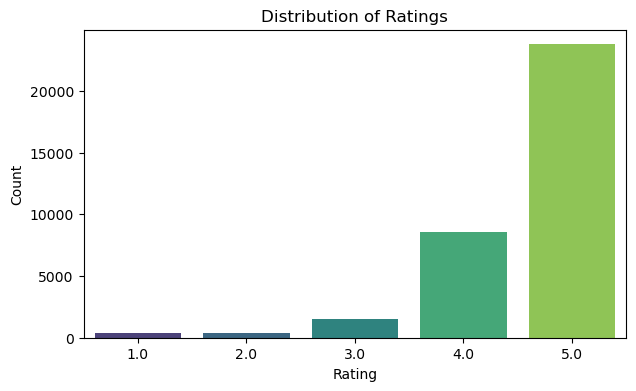

In [53]:
# Distribution of Ratings
plt.figure(figsize=(7, 4))
sns.countplot(x='reviews.rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [21]:
# Convert the 'reviews.date' column to datetime
df['reviews.date'] = pd.to_datetime(df['reviews.date'], format='ISO8601', errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['reviews.date'])

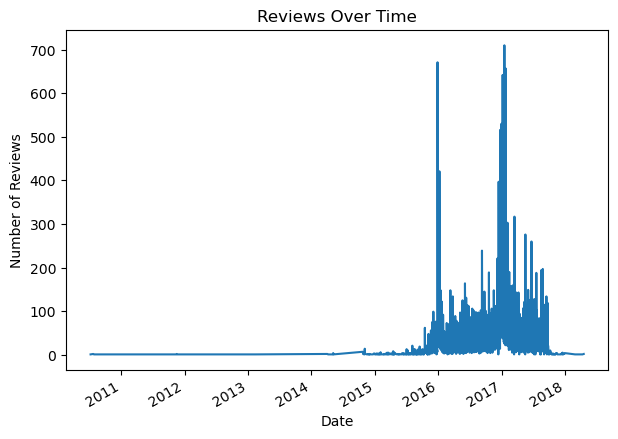

In [55]:
# Distribution of Reviews Over Time
plt.figure(figsize=(7, 5))
df['reviews.date'].value_counts().sort_index().plot()
plt.title('Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

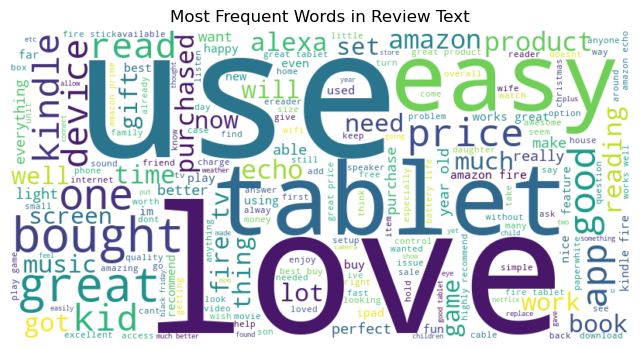

In [56]:
# Most Frequent Words in Review Text
all_text = ' '.join(df['reviews.text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Review Text')
plt.axis('off')
plt.show()

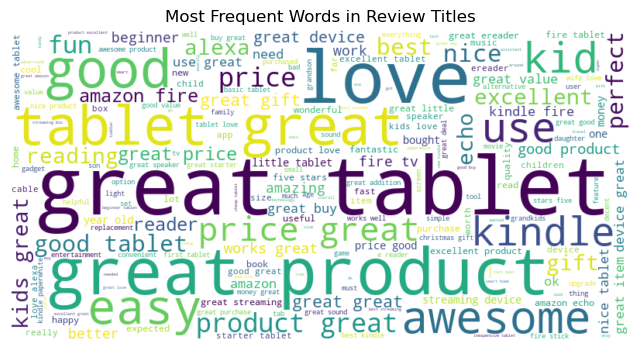

In [57]:
# Most Frequent Words in Review Titles
all_titles = ' '.join(df['reviews.title'])
wordcloud_titles = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud_titles, interpolation='bilinear')
plt.title('Most Frequent Words in Review Titles')
plt.axis('off')
plt.show()

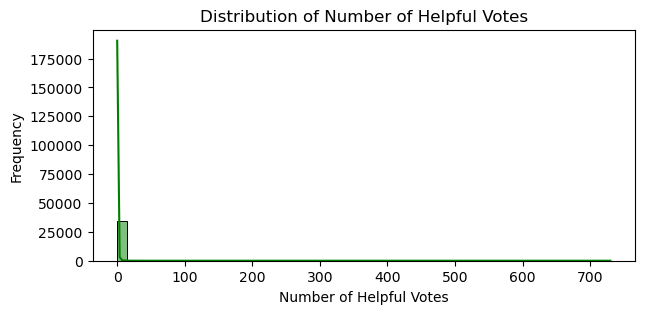

In [61]:
# Helpful Reviews Analysis
plt.figure(figsize=(7, 3))
sns.histplot(df['reviews.numHelpful'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribution of Number of Helpful Votes')
plt.xlabel('Number of Helpful Votes')
plt.ylabel('Frequency')
plt.show()

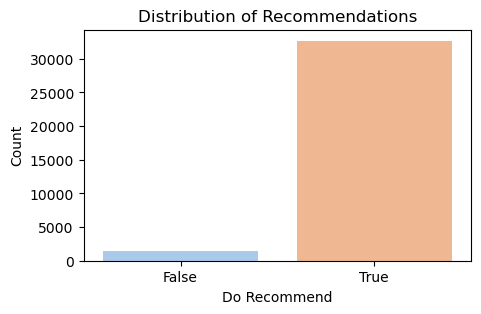

In [59]:
# Recommendations Analysis
plt.figure(figsize=(5, 3))
sns.countplot(x='reviews.doRecommend', data= df, palette='pastel')
plt.title('Distribution of Recommendations')
plt.xlabel('Do Recommend')
plt.ylabel('Count')
plt.show()

In [28]:
# Define sentiment labels based on ratings
def label_sentiment(rating):
    if rating >= 4:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'


In [29]:
# Apply the function to create a new column 'sentiment'
df['sentiment'] = df['reviews.rating'].apply(label_sentiment)

In [30]:
# Display the first few rows of the dataset to check the new sentiment column
df[['reviews.rating', 'sentiment']].head()

,reviews.rating,sentiment
0,5.0,positive
1,5.0,positive
2,5.0,positive
3,4.0,positive
4,5.0,positive


### Text Preprocessing

Text preprocessing is a critical step in natural language processing (NLP) that transforms raw text into a cleaner, standardized format for analysis. It involves converting text to lowercase, removing punctuation, and eliminating stop words. Additional steps include tokenization, stemming, lemmatization, and handling special characters or numbers. These processes help in reducing noise and extracting meaningful information, making the text data suitable for machine learning models and other analytical tasks

In [ ]:
import nltk 
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('wordnet')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [32]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [33]:
# Define text preprocessing function
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphabetic tokens, and apply lemmatization
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    # Join tokens back to a single string
    return ' '.join(tokens)



In [36]:
# Apply the preprocessing function to the review text
df['processed_text'] = df['reviews.text'].apply(preprocess_text)


In [38]:
# Display the first few rows of the dataset to check the processed text
df[['reviews.text', 'processed_text']].head()

,reviews.text,processed_text
0,this product so far has not disappointed my ch...,product far disappointed child love use like a...
1,great for beginner or experienced person bough...,great beginner experienced person bought gift ...
2,inexpensive tablet for him to use and learn on...,inexpensive tablet use learn step nabi thrille...
3,ive had my fire hd 8 two weeks now and i love ...,ive fire hd two week love tablet great valuewe...
4,i bought this for my grand daughter when she c...,bought grand daughter come visit set user ente...


### Converting text into Vectors
TF-IDF calculates that how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set). We will be implementing this with the code below.

In [39]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000) 

In [40]:
# Fit and transform the processed text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])


In [42]:
# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [43]:
# Add sentiment labels to the TF-IDF DataFrame
tfidf_df['sentiment'] = df['sentiment']


In [44]:
# Display the first few rows of the TF-IDF DataFrame
tfidf_df.head()

,abc,ability,able,abroad,absolute,absolutely,absolutly,abundance,abundant,abuse,...,youtube,youve,yr,zero,zip,zippy,zone,zoom,zwave,sentiment
0,0.0,0.315445,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
3,0.0,0.000000,0.104977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,positive


### Model training, Evaluation, and Prediction
 We can now explore any machine learning model to train the data

In [46]:
# Fit and transform the processed text
X = tfidf_vectorizer.fit_transform(df['processed_text'])

# Define the target variable
y = df['sentiment']


In [47]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)


In [49]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0) 
model.fit(X_train,y_train) 
  
#testing the model 
pred = model.predict(X_train) 
print(accuracy_score(y_train,pred))

0.9999137782376272


### Let’s see the confusion matrix for the results.

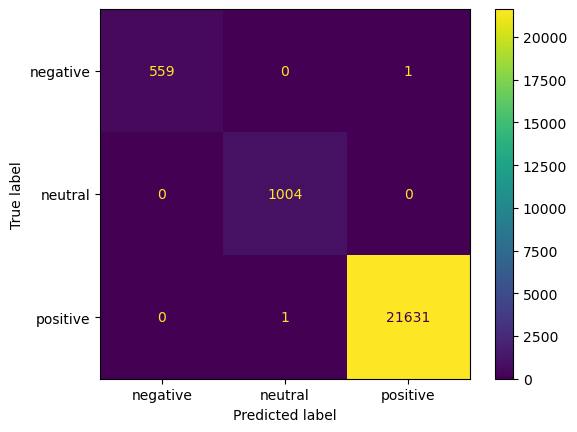

In [52]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_train, pred) 

# Get unique classes from the target variable
unique_classes = model.classes_

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes) 
cm_display.plot() 
plt.show()

### Conclusion
The Decision Tree Classifier has demonstrated strong performance with this dataset, effectively capturing the sentiment nuances in the reviews. Its ability to handle complex decision-making processes allows it to classify sentiments accurately. The model's interpretability makes it easier to understand which features influence sentiment predictions. This promising result suggests that the Decision Tree Classifier is well-suited for sentiment analysis in this context, providing valuable insights into customer opinions on the All-New Fire HD 8 Tablet.